# Notebook 1 (Features explained)

Project: Classification of song genre

Group Name: Prince Polo

Members: Anna Kudela, Kacper Szkudlarek, Szymon Kowaczyk


# Packs and path

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import librosa
import librosa.display
import IPython.display as ipd
import warnings
import os
import sys
import csv
from pydub import AudioSegment
import pydub
warnings.filterwarnings('ignore')
sys.path.append('/Users/kszku/Downloads/ffmpeg')

In [ ]:
audio_path = '/Users/kszku/Desktop/genres_original/blues/blues.00005.wav'
x , sr = librosa.load(audio_path)
print(type(x), type(sr))
print(x.shape, sr)

#shape - it's length in samples, sr - sample rate. We can quickly calculate that 
#the music sample has ~ 30 seconds. 


We can easily visualize the sample using librosa :) 

# Basic visualisation

Text(0.5, 1.0, 'Waveform for blues00005.wav')

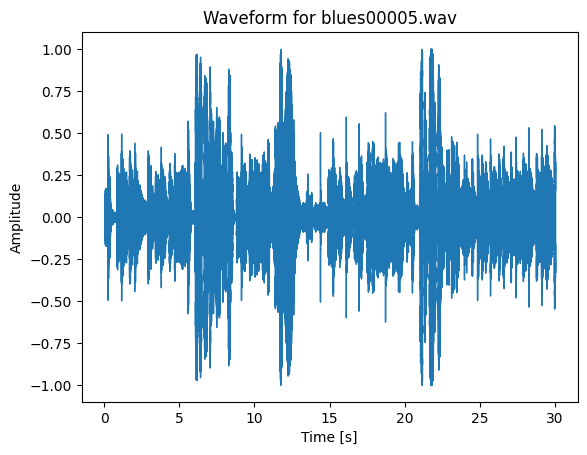

In [97]:
librosa.display.waveshow(x, sr=sr)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("Waveform for blues00005.wav")


What we can see is time in seconds on the x axis and the dynamics of the signal on the 
y axis from -1 to 1. This signal is in time domain, which is not the best thing to analize it. What we can see is only time and dynamics. We cannot distinguish easily between signals 
in this domain. So maybe we'll do an FFT?


In [8]:
# Default FFT window size
#n_fft = 2048 # FFT window size
#hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
n_fft = 2048
D = np.abs(librosa.stft(x[:n_fft], hop_length = n_fft+1))
print('Shape of D object:', np.shape(D))

Shape of D object: (1025, 1)


Text(0.5, 1.0, 'STFT for blues00005.wav')

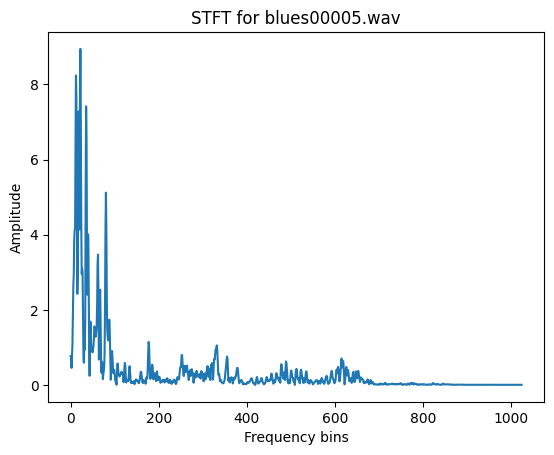

In [98]:
plt.plot(D)
plt.xlabel("Frequency bins")
plt.ylabel("Amplitude")
plt.title("STFT for blues00005.wav")


But FFT is also not good for music classification because FFT does not care much about time :-) 
So what should we do? We should use spectrograms! Spectrogram is a perfect combination 
between time domain and frequency domain.



Text(0, 0.5, 'Frequency [Hz]')

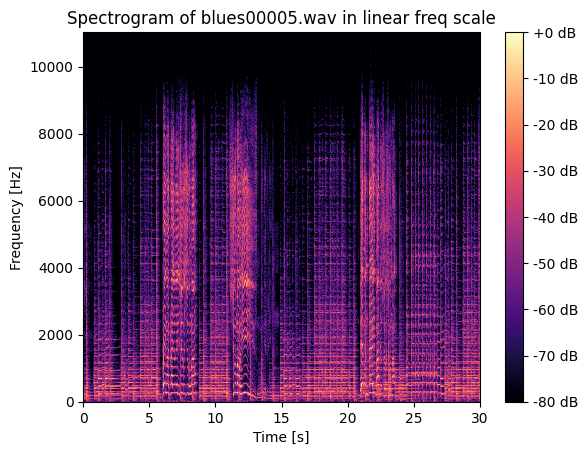

In [116]:
spec = np.abs(librosa.stft(x, hop_length=512))
spec = librosa.amplitude_to_db(spec, ref=np.max)
librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of blues00005.wav in linear freq scale')
plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")

Text(0, 0.5, 'Frequency [Hz]')

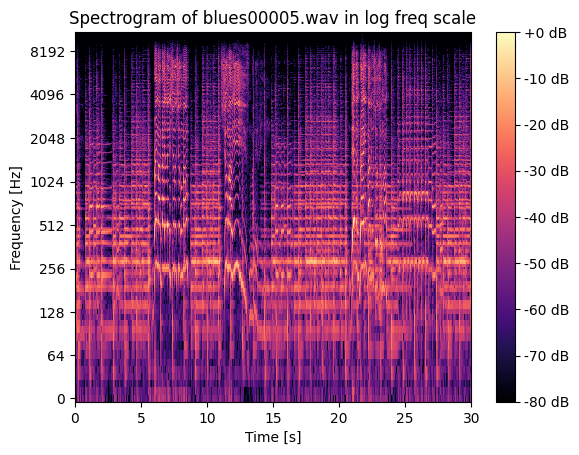

In [118]:
spec = np.abs(librosa.stft(x, hop_length=512))
spec = librosa.amplitude_to_db(spec, ref=np.max)
librosa.display.specshow(spec, sr=sr, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title('Spectrogram of blues00005.wav in log freq scale')
plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")


We should care about two scales! People hear in a logarithmic scale, not linear. We should also include the mel scale - The mel scale is a scale that reproduces subjective impressions of pitch - human hearing does not work linearly, but logarithmically. The influence of pitch is also influenced by the loudness of the sound - therefore, the mel scale assumes that the 
signal subjected to this scale is 40dB SPL


Text(0, 0.5, 'Frequency [Hz]')

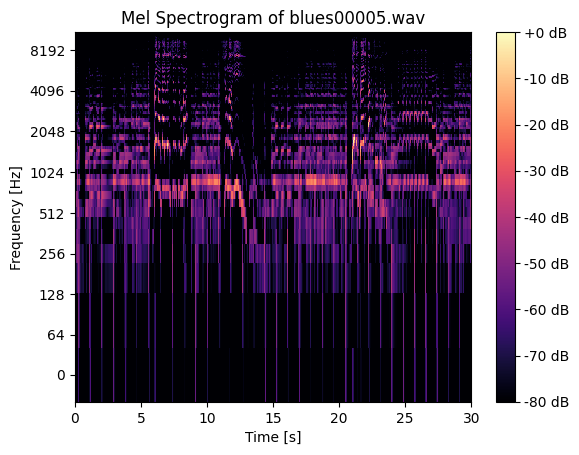

In [119]:
S = librosa.feature.melspectrogram(x, sr=sr) 
S_DB = librosa.amplitude_to_db(S, ref=np.max) 
librosa.display.specshow(S_DB, sr=sr, hop_length=512, x_axis = 'time', y_axis = 'log')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram of blues00005.wav')
plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")

Let's try to visualise some features that are used in this project based on operations above.

# Feature visualisation

### Harmonics and percussive components


Harmonics - A harmonic is a wave with a frequency that is a positive integer 
multiple of the fundamental frequency, the frequency of the original periodic signal

Percussive - percussive sound is what we perceive as a clash, a knock, a clap, or a click. 
The sound of a drum stroke or a transient that occurs in the attack phase of a musical tone 
are further typical examples. The prototype of a percussive sound is the acoustic realization
of an impulse, which corresponds to a vertical line in a spectrogram representation.


Text(0, 0.5, 'Amplitude')

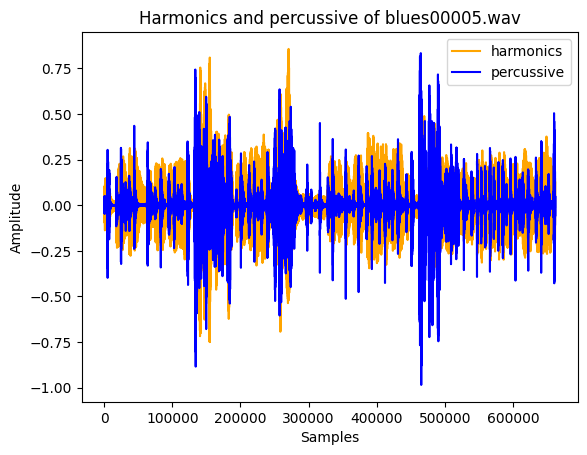

In [102]:
y_harm, y_perc = librosa.effects.hpss(x)
plt.plot(y_harm, color = 'orange')
plt.plot(y_perc, color = 'blue')
plt.legend(["harmonics", "percussive"])
plt.title("Harmonics and percussive of blues00005.wav");
plt.xlabel("Samples")
plt.ylabel("Amplitude")

### Chromogram


Chromogram - Classification of the pitch - We can see which pitch components
are present and how they are changing in time. We can guess the key of the song based on
chromogram. In this case i would go with D minor. 


Chromogram shape: (12, 67)


Text(0.5, 0, 'Time [s]')

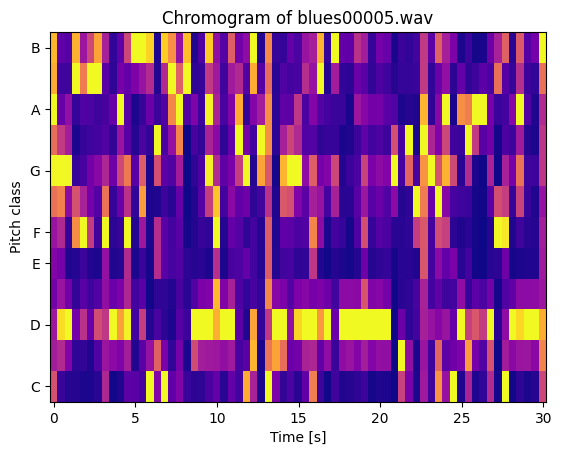

In [128]:
hop_length = 10000
chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
print('Chromogram shape:', chromagram.shape)
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='plasma');
plt.title("Chromogram of blues00005.wav");
plt.xlabel("Time [s]")

### RMS


Root mean square - no need to visualise this. It is just a square root of the arithmetic mean
of the squares of values. 


### Spectral Centroid and bandwidth

The spectral centroid is a measure used in digital signal processing to characterise 
a spectrum. It indicates where the center of mass of the spectrum is located. 
Perceptually, it has a robust connection with the impression of brightness of a sound.
It is sometimes called center of spectral mass.
The key difference between Bandwidth and Spectrum is that the bandwidth is the maximum rate of data transfer within a certain period of time whereas a spectrum is a collection of waves with particular frequencies arranged in order.


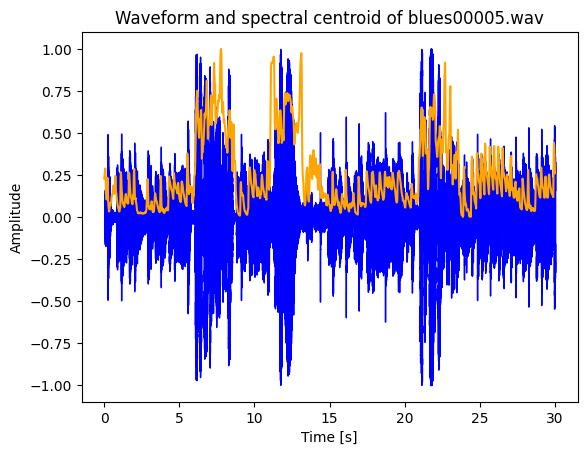

In [68]:
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
spec_cent = librosa.feature.spectral_centroid(x, sr=sr)[0]
frames = range(len(spec_cent))
t = librosa.frames_to_time(frames)
librosa.display.waveshow(x, sr=sr, color='blue');
plt.plot(t, normalize(spec_cent), color='orange');
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("Waveform and spectral centroid of blues00005.wav");

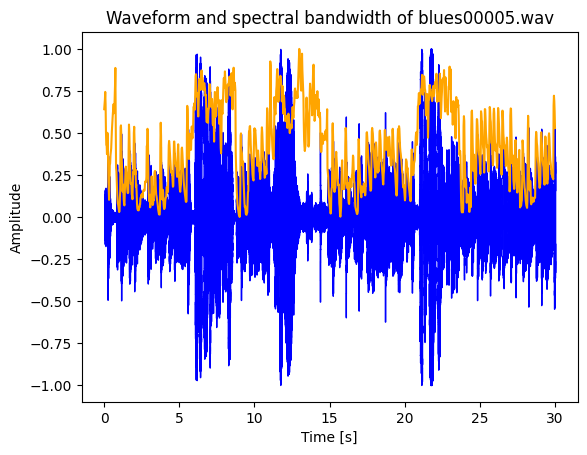

In [72]:
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
spec_bw = librosa.feature.spectral_bandwidth(x, sr=sr)[0]
frames = range(len(spec_bw))
t = librosa.frames_to_time(frames)
librosa.display.waveshow(x, sr=sr, color='blue');
plt.plot(t, normalize(spec_bw), color='orange');
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.title("Waveform and spectral bandwidth of blues00005.wav");


### Zero crossing rate

Zero crossing rate - how many times signal crosses the zero value. No need to visualize this.

### MFCC

That's a tough one, but let's make it short:
Cepstrum is a logarithmic function of the signal spectrum. 
With its help, it is possible to obtain many parameters - among them the MFCC parameters. 
Mel-cepstral parameters (MFCC) are parameters resulting from the cepstrum of a signal 
represented on the mel scale (hence the name).

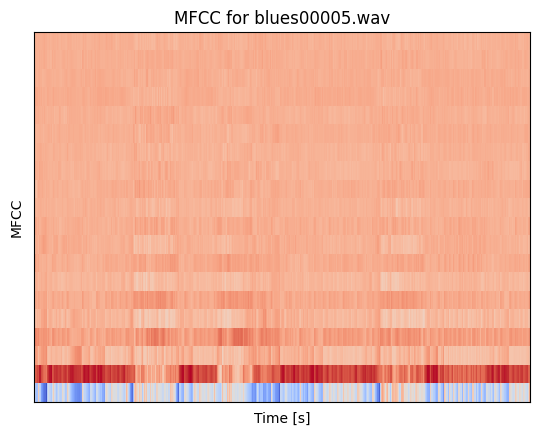

In [111]:
mfccs = librosa.feature.mfcc(x, hop_length=512, n_mfcc=20)
librosa.display.specshow(mfccs, sr=sr)
plt.xlabel("Time [s]")
plt.ylabel("MFCC")
plt.title("MFCC for blues00005.wav");

# Feature extraction 

In [ ]:
import librosa
import numpy as np
import os
import csv


header = 'filename tempo harm_mean harm_var perc_mean perc_var chromastft_mean chromastft_var rms_mean rms_var spectral_centroid_mean spectral_centroid_var spectral_bandwidth_mean spectral_bandwitdh_var zero_cross_mean zero_cross_var'

for i in range(1, 41):
    if i % 2 == 1:
        header += f' mfcc{i}_mean'
    else:
        header += f' mfcc{i}_var'
header += ' label'
header = header.split()

file = open('3a.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    for filename in os.listdir(f'/Users/kszku/Desktop/genres_original/{g}'):
        songname = f'/Users/kszku/Desktop/genres_original/{g}/{filename}'
        y, sr = librosa.load(songname, mono=True, duration=30)
        tempo, beats = librosa.beat.beat_track(y, sr=sr)
        y_harm, y_perc = librosa.effects.hpss(y)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rms = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        to_append = f'{filename} {(tempo)} {np.mean(y_harm)} {np.var(y_harm)} {np.mean(y_perc)} {np.var(y_perc)} {np.mean(chroma_stft)} {np.var(chroma_stft)} ' \
                    f'{np.mean(rms)} {np.var(rms)} {np.mean(spec_cent)} {np.var(spec_cent)} {np.mean(spec_bw)} {np.var(spec_bw)} {np.mean(zcr)} {np.var(zcr)}'
        for e in mfcc:
              to_append += f' {np.mean(e)} {np.var(e)}'
        to_append += f' {g}'
        file = open('data.csv', 'a', newline='')
        with file:
            writer = csv.writer(file)
            writer.writerow(to_append.split())

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data = pd.read_csv('data_ost2.csv')
data.head(10)

,filename,tempo,harm_mean,harm_var,perc_mean,perc_var,chromastft_mean,chromastft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwitdh_var,zero_cross_mean,zero_cross_var,mfcc1_mean,mfcc2_var,mfcc3_mean,mfcc4_var,mfcc5_mean,mfcc6_var,mfcc7_mean,mfcc8_var,mfcc9_mean,mfcc10_var,mfcc11_mean,mfcc12_var,mfcc13_mean,mfcc14_var,mfcc15_mean,mfcc16_var,mfcc17_mean,mfcc18_var,mfcc19_mean,mfcc20_var,mfcc21_mean,mfcc22_var,mfcc23_mean,mfcc24_var,mfcc25_mean,mfcc26_var,mfcc27_mean,mfcc28_var,mfcc29_mean,mfcc30_var,mfcc31_mean,mfcc32_var,mfcc33_mean,mfcc34_var,mfcc35_mean,mfcc36_var,mfcc37_mean,mfcc38_var,mfcc39_mean,mfcc40_var,label
0,blues.00093.wav,58.726918,0.000002,0.005319,-0.000104,0.000237,0.377736,0.096391,0.065891,0.001804,570.150688,104951.648432,995.093473,84457.870140,0.021701,0.000118,-350.358887,2658.621094,169.546326,622.736572,31.780231,316.824829,16.713755,213.633560,28.661758,188.343307,19.249090,68.675934,7.846699,40.632214,10.039796,36.653404,4.742695,40.674660,2.915623,36.656433,3.896542,46.585888,1.810350,42.379414,-5.970981,35.502491,-5.258748,33.884388,-0.228882,38.698620,-1.775328,35.267281,-3.708840,34.146069,0.175169,34.543179,2.076678,44.244164,-2.892004,61.476616,blues
1,blues.00087.wav,172.265625,0.000002,0.018143,-0.000081,0.003557,0.336742,0.094685,0.158012,0.002718,1441.999254,387323.611152,1870.239191,146888.711245,0.050889,0.001155,-155.516510,3074.938232,125.655754,802.149597,1.575322,493.725677,45.829868,354.142853,0.908994,262.174042,25.391241,157.651779,-10.813492,240.342636,15.574149,130.209534,-11.929206,161.722336,1.271778,109.133904,-6.661503,106.970657,-0.779125,111.845901,-7.749225,74.212379,0.419307,87.805008,-7.029632,84.766144,4.009109,61.712433,-6.266028,53.565445,0.951334,64.032364,2.006461,68.354385,-5.735763,84.034637,blues
2,blues.00050.wav,135.999178,-0.000001,0.014100,-0.000041,0.012256,0.400909,0.089653,0.182339,0.003975,1945.620794,147369.551256,2082.176477,73369.006624,0.085806,0.001220,-83.001678,2508.607178,107.067436,314.408478,-25.323681,340.755127,57.122074,204.339035,0.081299,138.097595,34.708904,73.037697,-11.047215,101.760567,20.533279,52.152657,-11.220151,60.900040,14.839782,59.191055,-10.229966,43.782063,12.542857,50.452110,-9.772627,45.126247,2.560521,45.165352,-6.298749,46.592693,3.008488,33.836430,-8.717002,38.787235,-0.325246,56.951794,-2.984734,42.425682,0.714617,55.568150,blues
3,blues.00044.wav,135.999178,-0.002170,0.010282,-0.004658,0.003142,0.390160,0.086286,0.136178,0.000467,2279.265543,170943.704603,2375.084795,53001.032278,0.092570,0.000900,-109.532341,826.480286,86.926498,227.939972,-8.624990,278.401642,64.489502,82.321434,-6.306035,55.121075,43.645821,38.844749,-8.293103,51.654362,28.546427,54.912731,-14.081590,77.672844,8.136635,85.496834,-21.490427,69.565910,11.086617,95.068817,-5.094468,91.481415,3.978772,68.865700,-12.864777,52.809814,12.342427,61.300636,0.020585,73.273537,-0.739238,56.313297,-5.130451,96.007965,3.307131,92.614929,blues
4,blues.00078.wav,123.046875,0.000013,0.027133,0.001124,0.015657,0.414258,0.082975,0.257949,0.002730,2333.716389,89830.069394,2227.415627,30643.873814,0.123863,0.000557,-2.551016,735.364624,101.257881,164.134262,-33.927292,142.827179,41.518402,99.837379,-13.815158,105.014244,31.920723,48.342281,-21.868601,66.767273,24.458948,42.868336,-15.881364,41.042320,15.794475,32.812149,-14.372411,43.872128,12.507441,41.156155,-13.373969,39.468418,6.112751,31.859306,-9.069670,35.527966,5.033296,24.009264,-11.333126,35.233288,3.168496,30.374691,-4.571702,46.855358,-4.033881,35.250755,blues
5,blues.00079.wav,78.302557,0.000017,0.040077,-0.000022,0.012195,0.421534,0.078732,0.270748,0.001897,2443.238916,130582.522123,2358.384492,31657.558213,0.124735,0.001186,-3.559072,1020.643372,92.927788,171.496109,-25.118544,148.003326,45.187210,65.705673,-10.871894,70.289307,31.862423,42.493450,-18.057922,72.849701,28.628012,48.181896,-10.234054,59.057201,14.673487,41.789806,-14.906988,30.210163,1

In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 57 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 1000 non-null   object 
 1   tempo                    1000 non-null   float64
 2   harm_mean                1000 non-null   float64
 3   harm_var                 1000 non-null   float64
 4   perc_mean                1000 non-null   float64
 5   perc_var                 1000 non-null   float64
 6   chromastft_mean          1000 non-null   float64
 7   chromastft_var           1000 non-null   float64
 8   rms_mean                 1000 non-null   float64
 9   rms_var                  1000 non-null   float64
 10  spectral_centroid_mean   1000 non-null   float64
 11  spectral_centroid_var    1000 non-null   float64
 12  spectral_bandwidth_mean  1000 non-null   float64
 13  spectral_bandwitdh_var   1000 non-null   float64
 14  zero_cross_mean          

We wanted to see what the learning results would be when we increased the dataset from 1,000
to 6,000 - splitting the music tracks from 30 seconds to 5-second samples. 


In [ ]:
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
for g in genres:
    for filename in os.listdir(f'/Users/kszku/Desktop/genres_original/{g}'):
        songname = f'/Users/kszku/Desktop/genres_original/{g}/{filename}'
        for i in range(0,6):
            newAudio = AudioSegment.from_wav(songname)
            newAudio = newAudio[i*5000:(i+1)*5000]
            newAudio.export(f'{i}_{filename}', format="wav")  # Exports to a wav file in the current path.
#newAudio = newAudio[0:t1]
#newAudio.export('newSong.wav', format="wav") #Exports to a wav file in the current path.

In [129]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data = pd.read_csv('data_ost_5s.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 57 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 6000 non-null   object 
 1   tempo                    6000 non-null   float64
 2   harm_mean                6000 non-null   float64
 3   harm_var                 6000 non-null   float64
 4   perc_mean                6000 non-null   float64
 5   perc_var                 6000 non-null   float64
 6   chromastft_mean          6000 non-null   float64
 7   chromastft_var           6000 non-null   float64
 8   rms_mean                 6000 non-null   float64
 9   rms_var                  6000 non-null   float64
 10  spectral_centroid_mean   6000 non-null   float64
 11  spectral_centroid_var    6000 non-null   float64
 12  spectral_bandwidth_mean  6000 non-null   float64
 13  spectral_bandwitdh_var   6000 non-null   float64
 14  zero_cross_mean         

In notebook 2 (30s samples) and notebook 3 (5s samples) we will use chosen ML method to predict genres